In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime, timedelta

from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Получение всех файлов json из папки со снами

In [ ]:
import os
fileDir = r"/content/drive/MyDrive/Sleep_MO/"
fileExt = r".json"
files = [os.path.join(fileDir, _) for _ in os.listdir(fileDir) if _.endswith(fileExt)]
files

['/content/drive/MyDrive/Sleep_MO/data_1.json',
 '/content/drive/MyDrive/Sleep_MO/data_3.json',
 '/content/drive/MyDrive/Sleep_MO/data_4.json',
 '/content/drive/MyDrive/Sleep_MO/data_5.json']

In [ ]:
df = pd.DataFrame()
for f in files:
  temp=pd.read_json(f)
  df = df.append(temp,ignore_index=True)
df.head()

<ipython-input-4-9791a1241403>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp,ignore_index=True)
<ipython-input-4-9791a1241403>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp,ignore_index=True)
<ipython-input-4-9791a1241403>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp,ignore_index=True)
<ipython-input-4-9791a1241403>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp,ignore_index=True)


,time,start_time,end_time,data_start,data_end,phases
0,8.100000,2022-08-09 21:52:00,2022-08-10 05:58:00,2022-08-10T00:52:00,2022-08-10T08:58:00,"[{'value': 'Light sleep', 'start_time': 166008..."
1,6.350000,2022-08-22 20:58:00,2022-08-23 03:19:00,2022-08-22T23:58:00,2022-08-23T06:19:00,"[{'value': 'Light sleep', 'start_time': 166120..."
2,2.250000,2022-07-31 22:20:00,2022-08-01 00:35:00,2022-08-01T01:20:00,2022-08-01T03:35:00,"[{'value': 'Light sleep', 'start_time': 165930..."
3,4.966667,2022-08-07 22:09:00,2022-08-08 03:07:00,2022-08-08T01:09:00,2022-08-08T06:07:00,"[{'value': 'Light sleep', 'start_time': 165991..."
4,2.750000,2022-08-15 23:45:00,2022-08-16 02:30:00,2022-08-16T02:45:00,2022-08-16T05:30:00,"[{'value': 'Light sleep', 'start_time': 166060..."


Преобразование в датасета сна в датасет фаз сна

In [ ]:
def make_phases(df_dreams_phases,columns):

  data_phases = pd.DataFrame(columns=columns)
  data_phases['index_dream'] = 0

  for i in range(len(df_dreams_phases)):

    for j in range(len(df_dreams_phases[i])):

        temp = df_dreams_phases[i][j]
        temp.update({"index_dream": i})
        data_phases = data_phases.append(temp,ignore_index=True)

  return data_phases

In [ ]:
data_phases = make_phases(df.phases, df.phases[0][0].keys())
data_phases

<ipython-input-5-f1fd99f90dcf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_phases = data_phases.append(temp,ignore_index=True)
<ipython-input-5-f1fd99f90dcf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_phases = data_phases.append(temp,ignore_index=True)
<ipython-input-5-f1fd99f90dcf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_phases = data_phases.append(temp,ignore_index=True)
<ipython-input-5-f1fd99f90dcf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_phases = data_phases.append(temp,ignore_index=True)
<ipython-input-5-f1fd99f90dcf>:12: FutureWarning: The frame.append method is deprecated and 

,value,start_time,end_time,time,data_start,data_end,index_dream
0,Light sleep,1660081920,1660082880,16,2022-08-10T00:52:00,2022-08-10T01:08:00,0
1,Deep sleep,1660082880,1660084260,23,2022-08-10T01:08:00,2022-08-10T01:31:00,0
2,Light sleep,1660084260,1660086060,30,2022-08-10T01:31:00,2022-08-10T02:01:00,0
3,REM,1660086060,1660086360,5,2022-08-10T02:01:00,2022-08-10T02:06:00,0
4,Light sleep,1660086360,1660087020,11,2022-08-10T02:06:00,2022-08-10T02:17:00,0
...,...,...,...,...,...,...,...
1141,Light sleep,1644284400,1644287460,51,2022-02-08T04:40:00,2022-02-08T05:31:00,59
1142,REM,1644287460,1644288900,24,2022-02-08T05:31:00,2022-02-08T05:55:00,59
1143,Light sleep,1644288900,1644289260,6,2022-02-08T05:55:00,2022-02-08T06:01:00,59
1144,REM,1644289260,1644290040,13,2022-02-08T06:01:00,2022-02-08T06:14:00,59


Добавление признаков: час, минута, дата, вечер\ночь\утро, разбиение признака время на абсолютное время сна(1 час сна, 2 час сна и т.д.)

In [ ]:
def date_convert_and_add_features(df):

  if ('data_start' in df.columns) and ('data_end' in df.columns):

    df.data_start = pd.to_datetime(df.data_start)
    df.data_end = pd.to_datetime(df.data_end)
    df.drop(['start_time','end_time'],axis=1,inplace=True)

    df['month'] = df.data_start.dt.month
    df['hour'] = df.data_start.dt.hour
    # df['minute'] = df.data_start.dt.minute
    df['dayofweek'] = df.data_start.dt.dayofweek
    df['time_of_day'] = df.hour.apply(lambda x: 'night' if x in [0,1,2,3,4,5] else ('morning' if x in [6,7,8,9,10,11,12] else ('evening' if x in [18,19,20,21,22,23] else 'day')))
  return df


In [ ]:
data_phases = date_convert_and_add_features(data_phases)
data_phases

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day
0,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night
1,Deep sleep,23,2022-08-10 01:08:00,2022-08-10 01:31:00,0,8,1,2,night
2,Light sleep,30,2022-08-10 01:31:00,2022-08-10 02:01:00,0,8,1,2,night
3,REM,5,2022-08-10 02:01:00,2022-08-10 02:06:00,0,8,2,2,night
4,Light sleep,11,2022-08-10 02:06:00,2022-08-10 02:17:00,0,8,2,2,night
...,...,...,...,...,...,...,...,...,...
1141,Light sleep,51,2022-02-08 04:40:00,2022-02-08 05:31:00,59,2,4,1,night
1142,REM,24,2022-02-08 05:31:00,2022-02-08 05:55:00,59,2,5,1,night
1143,Light sleep,6,2022-02-08 05:55:00,2022-02-08 06:01:00,59,2,5,1,night
1144,REM,13,2022-02-08 06:01:00,2022-02-08 06:14:00,59,2,6,1,morning


In [ ]:
data_phases = data_phases.append(df_sleeps_phases)
data_phases

<ipython-input-83-70d49776e9cd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_phases = data_phases.append(df_sleeps_phases)


,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day
0,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night
1,Deep sleep,23,2022-08-10 01:08:00,2022-08-10 01:31:00,0,8,1,2,night
2,Light sleep,30,2022-08-10 01:31:00,2022-08-10 02:01:00,0,8,1,2,night
3,REM,5,2022-08-10 02:01:00,2022-08-10 02:06:00,0,8,2,2,night
4,Light sleep,11,2022-08-10 02:06:00,2022-08-10 02:17:00,0,8,2,2,night
...,...,...,...,...,...,...,...,...,...
421,Light sleep,16,2023-03-11 09:50:00,2023-03-11 10:06:00,26,3,9,5,morning
422,Awake (during sleep cycle),2,2023-03-11 10:06:00,2023-03-11 10:08:00,26,3,10,5,morning
423,Light sleep,108,2023-03-11 10:08:00,2023-03-11 11:56:00,26,3,10,5,morning
424,Deep sleep,23,2023-03-11 11:56:00,2023-03-11 12:19:00,26,3,11,5,morning


In [ ]:
data_phases[data_phases.time_of_day == 'day']

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day
443,Light sleep,37,2023-03-02 13:27:00,2023-03-02 14:04:00,22,3,13,3,day
542,Deep sleep,14,2023-03-05 13:29:00,2023-03-05 13:43:00,29,3,13,6,day
543,Light sleep,14,2023-03-05 13:43:00,2023-03-05 13:57:00,29,3,13,6,day
544,Deep sleep,11,2023-03-05 13:57:00,2023-03-05 14:08:00,29,3,13,6,day
545,Light sleep,20,2023-03-05 14:08:00,2023-03-05 14:28:00,29,3,14,6,day
546,Light sleep,2,2023-03-05 14:28:00,2023-03-05 14:30:00,29,3,14,6,day
115,Deep sleep,14,2023-03-05 13:29:00,2023-03-05 13:43:00,6,3,13,6,day
116,Light sleep,14,2023-03-05 13:43:00,2023-03-05 13:57:00,6,3,13,6,day
117,Deep sleep,11,2023-03-05 13:57:00,2023-03-05 14:08:00,6,3,13,6,day
118,Light sleep,20,2023-03-05 14:08:00,2023-03-05 14:28:00,6,3,14,6,day


In [ ]:
data_phases[data_phases.index_dream == 30.0].time.sum()

329

In [ ]:
times_of_day = list(data_phases.time_of_day.unique())
df_time_of_day=pd.DataFrame()
df_time_of_day = data_phases[data_phases.time_of_day == 'morning'].groupby('value').agg({'time':'mean'}).rename(columns={'time':'morning'})

for tim in times_of_day:
  df_time_of_day[tim] = data_phases[data_phases.time_of_day == tim].groupby('value').agg({'time':'mean'}).rename(columns={'time':tim})


In [ ]:
df_time_of_day.fillna(0,inplace=True)

In [ ]:
data_phases.groupby('value').agg({'time':'mean'})

,time
value,
Awake (during sleep cycle),9.103093
Deep sleep,22.607595
Light sleep,29.904704
REM,8.458167


In [ ]:
df_time_of_day

,morning,night,evening,day
value,,,,
Awake (during sleep cycle),12.921053,6.473684,11.500000,0.00
Deep sleep,23.057377,21.508696,29.594595,12.50
Light sleep,30.428571,31.344689,16.096154,18.25
REM,8.265060,8.597561,6.750000,0.00


Разделение на минуты

In [ ]:
df_minutes = pd.DataFrame()

In [ ]:
for i in range(data_phases.shape[0]):
  df_minutes = df_minutes.append([data_phases.iloc[i,:]] * data_phases.time[i],ignore_index=True)
df_minutes

NameError: ignored

Для проверки правильности алгоритма проверим количество получившихся минут и количество минут по длительности во сне с индексом 30

In [ ]:
df_minutes[df_minutes.index_dream == 30.0].shape

(329, 9)

In [ ]:
data_phases[data_phases.index_dream == 30.0].time.sum()

329

Абсолютное время

In [ ]:
def create_abs_time(df):
  df['abs_min'] = 0
  df['abs_hour'] = 0
  for i in range(df.index_dream.max()+1):
    k=0
    hour = 0
    for ind in list(df[df.index_dream == i].index):
      df.loc[ind,'abs_min'] = k
      df.loc[ind,'abs_hour'] = hour
      if ((k % 60) == 0) and (k!=0):
        hour+=1
      k+=1
  return df

In [ ]:
df_minutes = create_abs_time(df_minutes)
df_minutes

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour
0,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,0,0
1,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,1,0
2,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,2,0
3,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,3,0
4,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,4,0
...,...,...,...,...,...,...,...,...,...,...,...
23971,Light sleep,28,2022-02-08 06:14:00,2022-02-08 06:42:00,59,2,6,1,morning,450,7
23972,Light sleep,28,2022-02-08 06:14:00,2022-02-08 06:42:00,59,2,6,1,morning,451,7
23973,Light sleep,28,2022-02-08 06:14:00,2022-02-08 06:42:00,59,2,6,1,morning,452,7
23974,Light sleep,28,2022-02-08 06:14:00,2022-02-08 06:42:00,59,2,6,1,morning,453,7


In [ ]:
df_minutes[df_minutes.index_dream == 30.0].abs_min.max()

328

In [ ]:
df_minutes[df_minutes.index_dream == 2].iloc[34:47,:]

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour
901,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,34,0
902,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,35,0
903,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,36,0
904,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,37,0
905,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,38,0
906,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,39,0
907,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,40,0
908,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,41,0
909,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,42,0
910,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,43,0


Нормализация часа на основе прошедших минут и времени начала сна

In [ ]:
def normalize_hour(df):
  df['norm_hour'] = 0

  for indexes in list(df.index_dream.unique()):
    time_start = df[df.index_dream == indexes].data_start.min()
    df.loc[df.index_dream == indexes,'norm_hour'] = (df[df.index_dream == indexes]['abs_min'].apply(lambda x:  pd.to_datetime(time_start) + timedelta(minutes=x))).dt.hour
  return df


In [ ]:
df_minutes = normalize_hour(df_minutes)
df_minutes

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour,norm_hour
0,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,0,0,0
1,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,1,0,0
2,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,2,0,0
3,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,3,0,0
4,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23971,Light sleep,28,2022-02-08 06:14:00,2022-02-08 06:42:00,59,2,6,1,morning,450,7,6
23972,Light sleep,28,2022-02-08 06:14:00,2022-02-08 06:42:00,59,2,6,1,morning,451,7,6
23973,Light sleep,28,2022-02-08 06:14:00,2022-02-08 06:42:00,59,2,6,1,morning,452,7,6
23974,Light sleep,28,2022-02-08 06:14:00,2022-02-08 06:42:00,59,2,6,1,morning,453,7,6


In [ ]:
df_minutes[df_minutes.index_dream == 2].iloc[34:47,:]

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour,norm_hour
901,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,34,0,1
902,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,35,0,1
903,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,36,0,1
904,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,37,0,1
905,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,38,0,1
906,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,39,0,1
907,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,40,0,2
908,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,41,0,2
909,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,42,0,2
910,Deep sleep,13,2022-08-01 01:54:00,2022-08-01 02:07:00,2,8,1,0,night,43,0,2


In [ ]:
df_minutes[df_minutes.index_dream == 59.0].abs_hour.max()

7

In [ ]:
df_minutes[df_minutes.index_dream == 59.0].abs_min.max() / 60

7.566666666666666

In [ ]:
df_minutes['hour'] = df_minutes['norm_hour']
df_minutes.drop('norm_hour',axis =1, inplace=True)

Сохраняем полученный датасет в файл csv

In [ ]:
df_minutes.to_csv('data_dreams_1.csv')

# Загрузка  датасета

In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/Sleep_MO/csv/data_dreams_all.csv', index_col=[0])
df_all

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour
0,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,0,0
1,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,1,0
2,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,2,0
3,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,3,0
4,Light sleep,16,2022-08-10 00:52:00,2022-08-10 01:08:00,0,8,0,2,night,4,0
...,...,...,...,...,...,...,...,...,...,...,...
36722,Light sleep,11,2023-02-07 10:14:00,2023-02-07 10:25:00,26,2,10,1,morning,408,6
36723,Light sleep,11,2023-02-07 10:14:00,2023-02-07 10:25:00,26,2,10,1,morning,409,6
36724,Light sleep,11,2023-02-07 10:14:00,2023-02-07 10:25:00,26,2,10,1,morning,410,6
36725,Light sleep,11,2023-02-07 10:14:00,2023-02-07 10:25:00,26,2,10,1,morning,411,6


In [ ]:
df_all.value.value_counts()

Light sleep                   24791
Deep sleep                     8930
REM                            2123
Awake (during sleep cycle)      883
Name: value, dtype: int64

In [ ]:
df_minutes = df_all.copy()

Проверяем частоту значения awake в целевой переменной

In [ ]:
df_minutes.value.value_counts()

Light sleep                   24791
Deep sleep                     8930
REM                            2123
Awake (during sleep cycle)      883
Name: value, dtype: int64

In [ ]:
list(df_minutes.value.value_counts()) / df_minutes.value.value_counts().sum()

Если представить соотношение фаз сна ко всем, то awake составляет всего 2%

In [ ]:
df_minutes[df_minutes.value == 'Awake (during sleep cycle)'].index_dream.value_counts()

14    119
22    103
25     99
1      52
15     48
13     36
36     29
11     27
21     27
30     25
57     21
39     21
20     19
29     19
7      19
38     19
3      18
26     17
12     13
0      13
6      12
9      11
18     10
23     10
24     10
19      9
49      9
47      8
44      8
48      7
32      7
4       7
5       7
54      5
41      4
56      4
2       4
31      4
43      1
55      1
37      1
Name: index_dream, dtype: int64

In [ ]:
INDEX_AWAKE = list(df_minutes[(df_minutes.value == 'Awake (during sleep cycle)')].index)
df_minutes_ = df_minutes.drop(INDEX_AWAKE,axis=0)

In [ ]:
df_minutes_.shape

(35844, 11)

In [ ]:
df_minutes_.value.unique()

array(['Light sleep', 'Deep sleep', 'REM'], dtype=object)

Посмотреть на зависимость фазы от абсолютного времени

Text(0, 0.5, 'Тип сна')

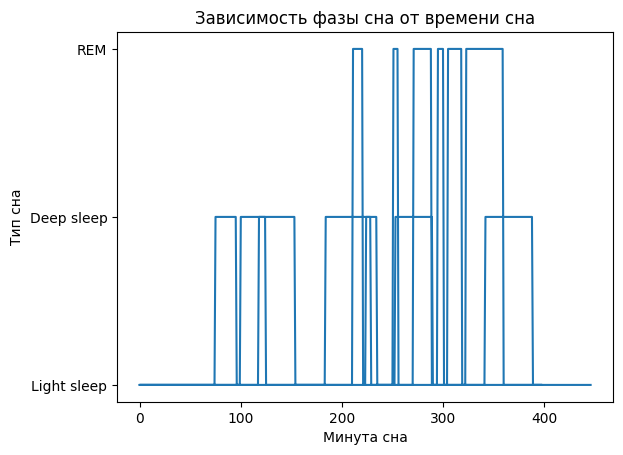

In [ ]:
temp = df_minutes_[df_minutes_.index_dream==9]
plt.plot(temp.abs_min, temp.value)
# sns.relplot(data=df_minutes, x="abs_min", y="value",kind="line")
plt.title('Зависимость фазы сна от времени сна')
plt.xlabel('Минута сна')
plt.ylabel('Тип сна')

In [ ]:
df_minutes_.groupby(['value','time_of_day']).agg

<bound method DataFrameGroupBy.aggregate of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f9e174ead60>>

Удаление лишних столбцов, разделение на обучающую и тестовую выборку

In [ ]:
X = df_minutes_.drop('value',axis=1)
y = df_minutes_.value

In [ ]:
X.drop(['time','data_start','data_end','index_dream'],axis=1,inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35844 entries, 0 to 36726
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        35844 non-null  int64 
 1   hour         35844 non-null  int64 
 2   dayofweek    35844 non-null  int64 
 3   time_of_day  35844 non-null  object
 4   abs_min      35844 non-null  int64 
 5   abs_hour     35844 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.9+ MB


In [ ]:
categorical = ['hour','dayofweek','time_of_day','month']
numeric = ['abs_min']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42) #,shuffle=True

In [ ]:
X_train.shape

(25090, 6)

In [ ]:
X_test.shape

(10754, 6)

In [ ]:
le  = LabelEncoder().fit(y_train)
y_train_scaled = le.transform(y_train)
y_test_scaled = le.transform(y_test)
y_train_scaled

array([1, 2, 1, ..., 2, 1, 1])

In [ ]:
import pickle
pickle.dump(le, open("LabelEncoderPhases.p", "wb"))

In [ ]:
# y_scaled = y.copy()
# le  = LabelEncoder().fit(y_scaled)
# y_scaled = le.transform(y_scaled)
# y_scaled

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
le.classes_

array(['Deep sleep', 'Light sleep', 'REM'], dtype=object)

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe',OneHotEncoder(handle_unknown="ignore"),categorical),
    ('scaling',StandardScaler(),numeric),

])

X_train_scaled = column_transformer.fit_transform(X_train[categorical+numeric])
X_test_scaled = column_transformer.transform(X_test[categorical+numeric])
X_train_scaled


<25090x37 sparse matrix of type '<class 'numpy.float64'>'
	with 125450 stored elements in Compressed Sparse Row format>

In [ ]:
pickle.dump(column_transformer, open("column_transformer_phases.p", "wb"))

In [ ]:
df_minutes_[categorical+numeric].head()

,hour,dayofweek,time_of_day,month,abs_min
0,0,2,night,8,0
1,0,2,night,8,1
2,0,2,night,8,2
3,0,2,night,8,3
4,0,2,night,8,4


In [ ]:
def check_time_of_day(hour):
  return 'night' if hour in [0, 1, 2, 3, 4, 5] \
            else ( 'morning' if hour in [6, 7, 8, 9, 10, 11, 12]
                   else ('evening' if hour in [18, 19, 20, 21, 22, 23]
                         else 'day'))

In [ ]:
def create_dataframe_by_minutes(time_start, total_minutes):

        df = pd.DataFrame()
        start_min = time_start.minute
        hour = time_start.hour
        month = time_start.month
        dayofweek = time_start.weekday()

        for i in range(total_minutes):

            row = {'hour': hour,
                   'dayofweek': dayofweek,
                   'time_of_day':check_time_of_day(hour),
                   'month': month,
                   'abs_min': i}
            df = df.append(row,ignore_index=True)

            if (start_min+i) % 60 == 0 and (start_min+i!=0):
                hour+=1
            if hour == 24:
                hour = 0
                dayofweek = (dayofweek+1) if dayofweek< 6 else 0

        return df

In [ ]:
time_start = datetime(2023, 4, 13,22,30)
time_end = datetime(2023, 4, 14,7,5)

In [ ]:
total_minutes = int( abs((time_start - time_end).total_seconds()) / 60 )
total_minutes

515

In [ ]:
create_dataframe_by_minutes(time_start, total_minutes)

In [ ]:
x = (datetime(2023, 4, 13,20,30) - datetime(2023, 4, 13,21,30))
secs = abs(x.total_seconds())
minutes = int(secs / 60)

In [ ]:
minutes

60

In [ ]:
start_min =  time_start.minute
start_min + 5

35

In [ ]:
time_end - timedelta(minutes=minutes)

datetime.datetime(2023, 4, 13, 19, 30)

# Обучение модели

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Ridge

In [ ]:
ridge = RidgeClassifier().fit(X_train_scaled, y_train_scaled)

print("Score train data",ridge.score(X_train_scaled,y_train_scaled))
print("Score test data",ridge.score(X_test_scaled,y_test_scaled))

Score train data 0.7023913909924273
Score test data 0.6999256090756928


In [ ]:
y_pred_ridge = ridge.predict(X_test_scaled)
print("f1 score micro: ", f1_score(y_test_scaled, y_pred_ridge, average='macro'))
print("f1 score weighted: ", f1_score(y_test_scaled, y_pred_ridge, average='weighted'))

f1 score micro:  0.34550779379783547
f1 score weighted:  0.6209152652593155


KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train_scaled)

print("Score train data",neigh.score(X_train_scaled,y_train_scaled))
print("Score test data",neigh.score(X_test_scaled,y_test_scaled))

Score train data 0.946751693901953
Score test data 0.9054305374744281


In [ ]:
y_pred_neigh = neigh.predict(X_test_scaled)
print("f1 score micro: ", f1_score(y_test_scaled, y_pred_neigh, average='macro'))
print("f1 score weighted: ", f1_score(y_test_scaled, y_pred_neigh, average='weighted'))

f1 score micro:  0.815164492338378
f1 score weighted:  0.9043082889156563


Случайный лес

In [ ]:
clf = RandomForestClassifier(max_depth = 18, n_estimators = 116, random_state=42).fit(X_train_scaled, y_train_scaled)

print("Score train data",clf.score(X_train_scaled,y_train_scaled))
print("Score test data",clf.score(X_test_scaled,y_test_scaled))

Score train data 0.9594260661618175
Score test data 0.9130556072159196


In [ ]:
y_pred = clf.predict(X_test_scaled)
print("f1 score micro: ", f1_score(y_test_scaled, y_pred, average='macro'))
print("f1 score weighted: ", f1_score(y_test_scaled, y_pred, average='weighted'))

f1 score micro:  0.8257773918674909
f1 score weighted:  0.9115032353403207


In [ ]:
pickle.dump(clf, open("model_phases.pkl", "wb"))

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 116,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

AdaBoost

In [ ]:
ada = AdaBoostClassifier(n_estimators=100,random_state=0).fit(X_train_scaled, y_train_scaled)

In [ ]:
y_pred_ada = ada.predict(X_test_scaled)
print("Score train data",ada.score(X_train_scaled,y_train_scaled))
print("Score test data",ada.score(X_test_scaled,y_test_scaled))

Score train data 0.688680749302511
Score test data 0.687465129254231


In [ ]:
cbc = GradientBoostingClassifier(n_estimators=105, learning_rate=0.1, random_state=0).fit(X_train_scaled, y_train_scaled)

In [ ]:
y_pred_cbc = cbc.predict(X_test_scaled)
print("Score train data",cbc.score(X_train_scaled,y_train_scaled))
print("Score test data",cbc.score(X_test_scaled,y_test_scaled))

Score train data 0.7582303706656038
Score test data 0.7545099497861261


Визуализация результата

In [ ]:
one_dream = df_minutes_[df_minutes_.index_dream == 15]
# one_dream['time'] = one_dream['time_norm'].dt.strftime('%H:%M:%S')
one_dream

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour
4645,Light sleep,13,2022-08-06 00:57:00,2022-08-06 01:10:00,15,8,0,5,night,0,0
4646,Light sleep,13,2022-08-06 00:57:00,2022-08-06 01:10:00,15,8,0,5,night,1,0
4647,Light sleep,13,2022-08-06 00:57:00,2022-08-06 01:10:00,15,8,0,5,night,2,0
4648,Light sleep,13,2022-08-06 00:57:00,2022-08-06 01:10:00,15,8,1,5,night,3,0
4649,Light sleep,13,2022-08-06 00:57:00,2022-08-06 01:10:00,15,8,1,5,night,4,0
...,...,...,...,...,...,...,...,...,...,...,...
31369,Light sleep,47,2023-02-25 08:35:00,2023-02-25 09:22:00,15,2,9,5,morning,324,5
31370,Light sleep,47,2023-02-25 08:35:00,2023-02-25 09:22:00,15,2,9,5,morning,325,5
31371,Light sleep,47,2023-02-25 08:35:00,2023-02-25 09:22:00,15,2,9,5,morning,326,5
31372,Light sleep,47,2023-02-25 08:35:00,2023-02-25 09:22:00,15,2,9,5,morning,327,5


In [ ]:
X_one_ = one_dream[categorical+numeric]
y_one_ = one_dream.value

y_one_scaled = le.transform(y_one_)
X_one_scaled = column_transformer.transform(X_one_)

y_one_pred = clf.predict(X_one_scaled)
print("Score data",clf.score(X_one_scaled,y_one_scaled))

Score data 0.9818181818181818


In [ ]:
y_one_scaled.shape

(550,)

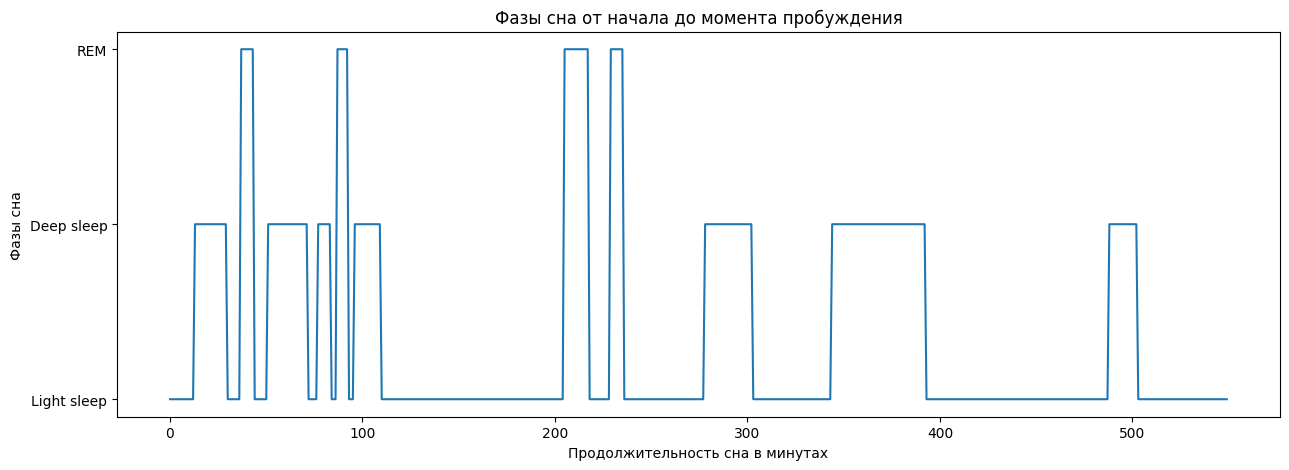

In [ ]:

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

ax.plot(le.inverse_transform(y_one_scaled), label='True data')

plt.title('Фазы сна от начала до момента пробуждения')
plt.ylabel('Фазы сна')
plt.xlabel('Продолжительность сна в минутах')
plt.show()

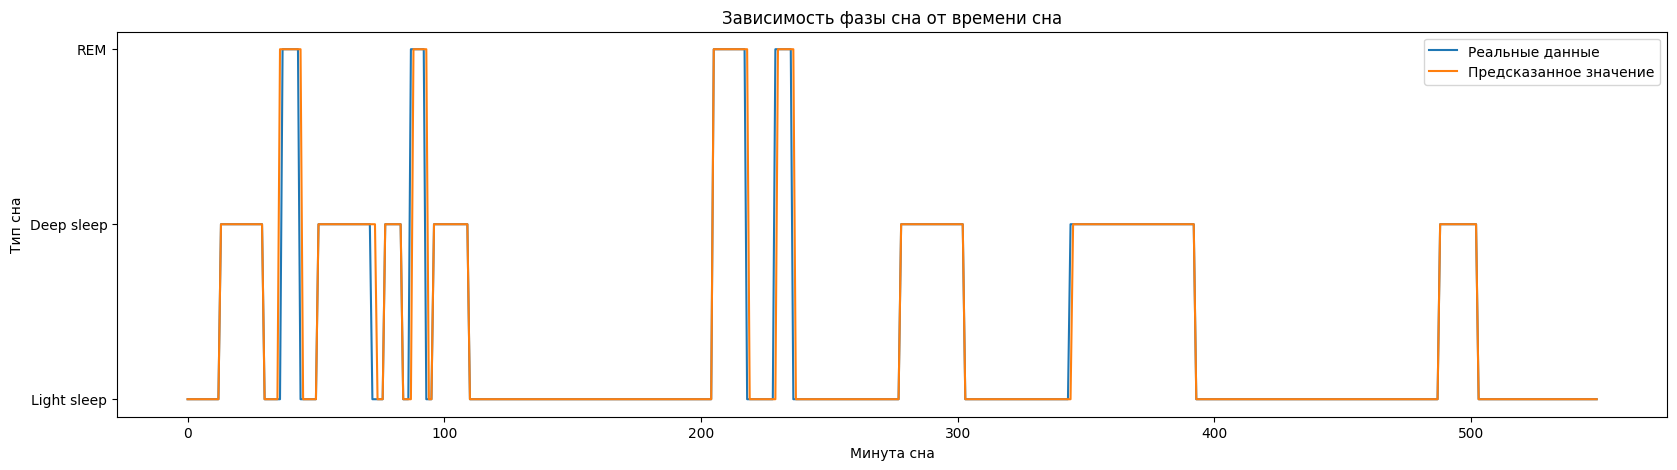

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(le.inverse_transform(y_one_scaled), label='Реальные данные')
plt.plot(le.inverse_transform(y_one_pred), label='Предсказанное значение')
# sns.relplot(data=df_minutes, x="abs_min", y="value",kind="line")
plt.title('Зависимость фазы сна от времени сна')
plt.xlabel('Минута сна')
plt.ylabel('Тип сна')
plt.legend()
plt.show()

In [ ]:
one_dream = df_minutes_[df_minutes_.index_dream == 16]
X_one_ = one_dream[categorical+numeric]
y_one_ = one_dream.value

y_one_scaled = le.transform(y_one_)
X_one_scaled = column_transformer.transform(X_one_)

y_one_pred = clf.predict(X_one_scaled)
print("Score data",clf.score(X_one_scaled,y_one_scaled))

Score data 0.9851752021563343


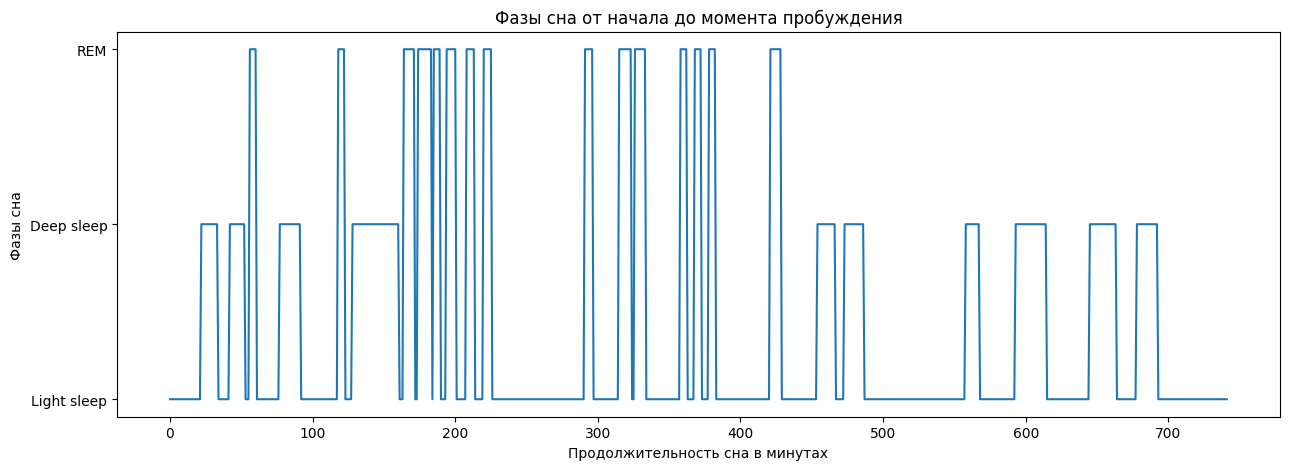

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

ax.plot(le.inverse_transform(y_one_scaled), label='True data')

plt.title('Фазы сна от начала до момента пробуждения')
plt.ylabel('Фазы сна')
plt.xlabel('Продолжительность сна в минутах')
plt.show()

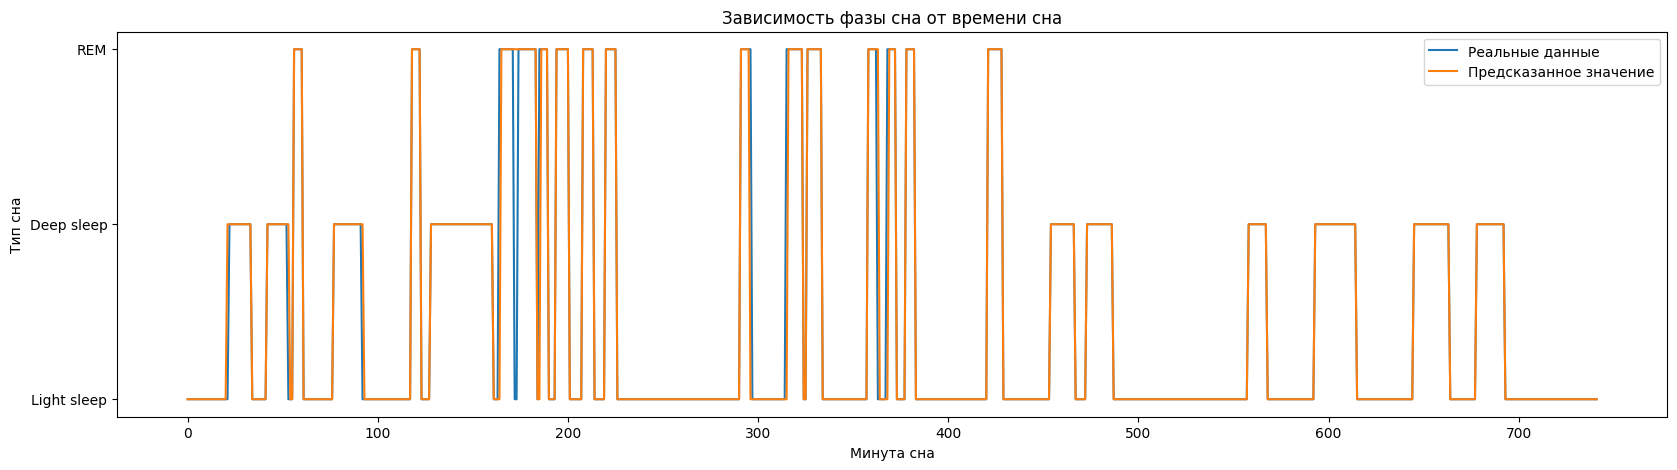

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(le.inverse_transform(y_one_scaled), label='Реальные данные')
plt.plot(le.inverse_transform(y_one_pred), label='Предсказанное значение')
# sns.relplot(data=df_minutes, x="abs_min", y="value",kind="line")
plt.title('Зависимость фазы сна от времени сна')
plt.xlabel('Минута сна')
plt.ylabel('Тип сна')
plt.legend()
plt.show()

## Подбор гиперпараметров

Подбираются параметры для классификатора - Случайный лес,

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_scaled, test_size=0.4, random_state = 42,shuffle=True)

array([1, 2, 1, ..., 2, 1, 1])

In [ ]:
X_val.shape

(10036, 6)

In [ ]:
parameters = {
    'n_estimators': np.linspace(100,145,45, dtype = int),
    'max_depth': np.linspace(15,20,5, dtype = int)}

grid = GridSearchCV(RandomForestClassifier(), parameters)

In [ ]:
grid.fit(X_val,y_val)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([15, 16, 17, 18, 20]),
                         'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 145])})

In [ ]:
grid.best_params_

{'max_depth': 20, 'n_estimators': 109}

In [ ]:
grid.best_estimator_.score(X_train,y_train)

In [ ]:
grid.best_estimator_.score(X_test,y_test)

## Тестирование на реальных данных

In [ ]:
test_df = pd.read_json("/content/drive/MyDrive/Sleep_MO/test/data_2.json")
test_df

,time,start_time,end_time,data_start,data_end,phases
0,1.283333,2023-02-06 20:12:00,2023-02-06 21:29:00,2023-02-06T23:12:00,2023-02-07T00:29:00,"[{'value': 'Light sleep', 'start_time': 167571..."
1,6.883333,2023-02-07 00:32:00,2023-02-07 07:25:00,2023-02-07T03:32:00,2023-02-07T10:25:00,"[{'value': 'Light sleep', 'start_time': 167572..."
2,7.333333,2023-02-06 00:08:00,2023-02-06 07:28:00,2023-02-06T03:08:00,2023-02-06T10:28:00,"[{'value': 'Light sleep', 'start_time': 167564..."


In [ ]:
test_df.phases[0]

[{'value': 'Light sleep',
  'start_time': 1675714320,
  'end_time': 1675714920,
  'time': 10,
  'data_start': '2023-02-06T23:12:00',
  'data_end': '2023-02-06T23:22:00'},
 {'value': 'Deep sleep',
  'start_time': 1675714920,
  'end_time': 1675715820,
  'time': 15,
  'data_start': '2023-02-06T23:22:00',
  'data_end': '2023-02-06T23:37:00'},
 {'value': 'Light sleep',
  'start_time': 1675715820,
  'end_time': 1675718940,
  'time': 52,
  'data_start': '2023-02-06T23:37:00',
  'data_end': '2023-02-07T00:29:00'}]

In [ ]:
#преобразование в датасет фаз сна
test_phases = pd.DataFrame(columns=test_df.phases[0][0].keys())
test_phases['index_dream'] = 0

for i in range(len(test_df.phases)):
  for j in range(len(test_df.phases[i])):

      temp = test_df.phases[i][j]
      temp.update({"index_dream": i})
      test_phases = test_phases.append(temp,ignore_index=True)

test_phases.data_start = pd.to_datetime(test_phases.data_start)
test_phases['hour'] = test_phases.data_start.dt.hour
test_phases['month'] = test_phases.data_start.dt.month
# test_phases['minute'] = test_phases.data_start.dt.minute
test_phases['dayofweek'] = test_phases.data_start.dt.dayofweek
test_phases['time_of_day'] = test_phases.hour.apply(lambda x: 'night' if x in [0,1,2,3,4,5] else ('morning' if x in [6,7,8,9,10,11,12] else ('evening' if x in [18,19,20,21,22,23] else 'day')))

test_phases.head()

In [ ]:
test_phases[test_phases.index_dream == 0].time.sum()

77

In [ ]:
#преобразование в датасет минутный
test_minutes = pd.DataFrame()

for i in range(test_phases.shape[0]):
  test_minutes = test_minutes.append([test_phases.iloc[i,:]] * test_phases.time[i],ignore_index=True)

test_minutes['abs_min']=0
test_minutes['abs_hour']=0

for i in range(test_minutes.index_dream.max()+1):
  k=0
  hour = 0
  for ind in list(test_minutes[test_minutes.index_dream == i].index):
    test_minutes.loc[ind,'abs_min'] = k
    test_minutes.loc[ind,'abs_hour'] = hour
    if ((k % 60) == 0) and (k!=0):
      hour+=1
    k+=1

test_minutes[test_minutes.index_dream == 0.0]

<ipython-input-41-ce78e459cd53>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_minutes = test_minutes.append([test_phases.iloc[i,:]] * test_phases.time[i],ignore_index=True)


,value,start_time,end_time,time,data_start,data_end,index_dream,hour,month,dayofweek,time_of_day,abs_min,abs_hour
0,Light sleep,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,0,0
1,Light sleep,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,1,0
2,Light sleep,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,2,0
3,Light sleep,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,3,0
4,Light sleep,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Light sleep,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,72,1
73,Light sleep,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,73,1
74,Light sleep,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,74,1
75,Light sleep,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,75,1


In [ ]:
test_minutes.shape

(930, 13)

In [ ]:
test_minutes.index_dream.unique()

array([0, 1, 2])

In [ ]:
test_minutes.drop(list(test_minutes.loc[test_minutes.value == 'Awake (during sleep cycle)'].index),axis=0,inplace=True)

Разделение тестовой выборки

In [ ]:
df_test_minutes_0 = test_minutes[test_minutes.index_dream == 0]
df_test_minutes_0

,value,start_time,end_time,time,data_start,data_end,index_dream,hour,month,dayofweek,time_of_day,abs_min,abs_hour
0,Light sleep,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,0,0
1,Light sleep,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,1,0
2,Light sleep,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,2,0
3,Light sleep,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,3,0
4,Light sleep,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Light sleep,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,72,1
73,Light sleep,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,73,1
74,Light sleep,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,74,1
75,Light sleep,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,75,1


In [ ]:
df_test_minutes_0.groupby('value').agg('count').iloc[:,:1].rename(columns={'start_time':'mean','value':'phase'})

,mean
value,
Deep sleep,15
Light sleep,62


In [ ]:
X = df_test_minutes_0.drop('value',axis=1)
y = df_test_minutes_0.value
X

,start_time,end_time,time,data_start,data_end,index_dream,hour,month,dayofweek,time_of_day,abs_min,abs_hour
0,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,0,0
1,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,1,0
2,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,2,0
3,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,3,0
4,1675714320,1675714920,10,2023-02-06 23:12:00,2023-02-06T23:22:00,0,23,2,0,evening,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
72,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,72,1
73,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,73,1
74,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,74,1
75,1675715820,1675718940,52,2023-02-06 23:37:00,2023-02-07T00:29:00,0,23,2,0,evening,75,1


Преобразование часа

In [ ]:
# x.data_start + timedelta(minutes=x['abs_min'])
X['norm_hour'] = (X[['data_start','abs_min']].apply(lambda x: x.data_start + timedelta(minutes=x['abs_min']),axis=1)).dt.hour
X['hour'] = X['norm_hour']
X.drop(['start_time','end_time', 'time','data_start','data_end','index_dream','norm_hour'],axis =1, inplace= True)

In [ ]:
X_scaled = column_transformer.transform(X[categorical+numeric])

y_scaled = y.copy()
y_scaled = le.transform(y_scaled)

clf.score(X_scaled,y_scaled)

0.6363636363636364

In [ ]:
y_pred = clf.predict(X_scaled)

plt.figure(figsize=(20,5))
plt.plot(le.inverse_transform(y_scaled), label='Реальные данные')
plt.plot(le.inverse_transform(y_pred), label='Предсказанное значение')

plt.title('Зависимость фазы сна от времени сна')
plt.xlabel('Минута сна')
plt.ylabel('Тип сна')
plt.legend()
plt.show()

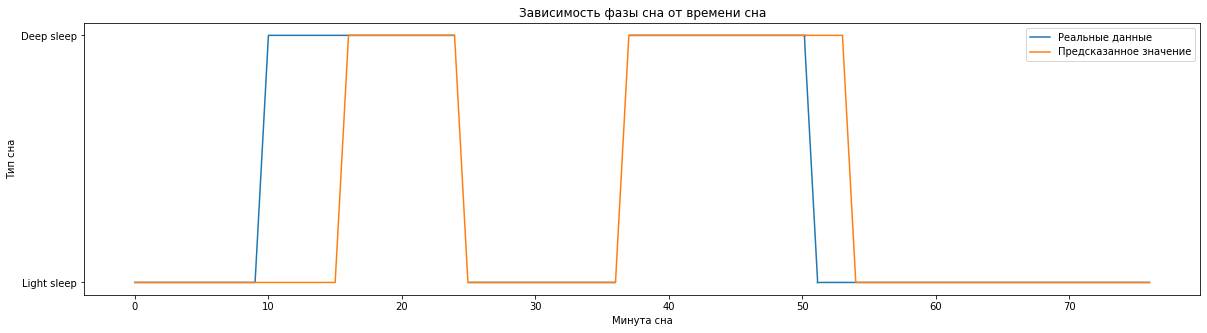

# Получение времени будильника

In [ ]:
columns_transform_phases = column_transformer
model_phases = clf

In [ ]:
def check_time_of_day( hour):
        return (
            "night"
            if hour in [0, 1, 2, 3, 4, 5]
            else (
                "morning"
                if hour in [6, 7, 8, 9, 10, 11, 12]
                else ("evening" if hour in [18, 19, 20, 21, 22, 23] else "day")
            )
        )

In [ ]:
def create_dataframe_by_minutes( time_start, total_minutes):

        df = pd.DataFrame()
        start_min = time_start.minute
        hour = time_start.hour
        month = time_start.month
        dayofweek = time_start.weekday()

        for i in range(total_minutes):

            row = {
                "hour": hour,
                "dayofweek": dayofweek,
                "time_of_day": check_time_of_day(hour),
                "month": month,
                "abs_min": i,
            }

            df = df.append(row, ignore_index=True)

            if (start_min + i) % 60 == 0 and (start_min + i != 0):
                hour += 1
            if hour == 24:
                hour = 0
                dayofweek = (dayofweek + 1) if dayofweek < 6 else 0

        return df

In [ ]:
def predict_phases( time_start, time_end):

        total_minutes = int(abs((time_start - time_end).total_seconds()) / 60)
        print(total_minutes)
        df = create_dataframe_by_minutes(time_start, total_minutes)
        df_scaled = columns_transform_phases.transform(
            pd.DataFrame(df, index=[0])
        )

        return model_phases.predict(df_scaled)

In [ ]:
def find_time_waking_up( sleep_start, sleep_end, interval_start, interval_end ):

        ending = sleep_end if sleep_end >= interval_end else interval_end

        phases = predict_phases(sleep_start, ending)

        label_encode = le
        index_phases = 1# label_encode.classes_.index("Light sleep")

        interval = int((abs(ending - interval_start)).total_seconds() / 60)
        count_minute = 0

        while count_minute != interval:
            if phases[-count_minute] == index_phases:
                break
            count_minute += 1

        if (count_minute == interval) and (
            phases[-count_minute] != index_phases
        ):
            return ending
        else:
            return ending - timedelta(minutes=count_minute)


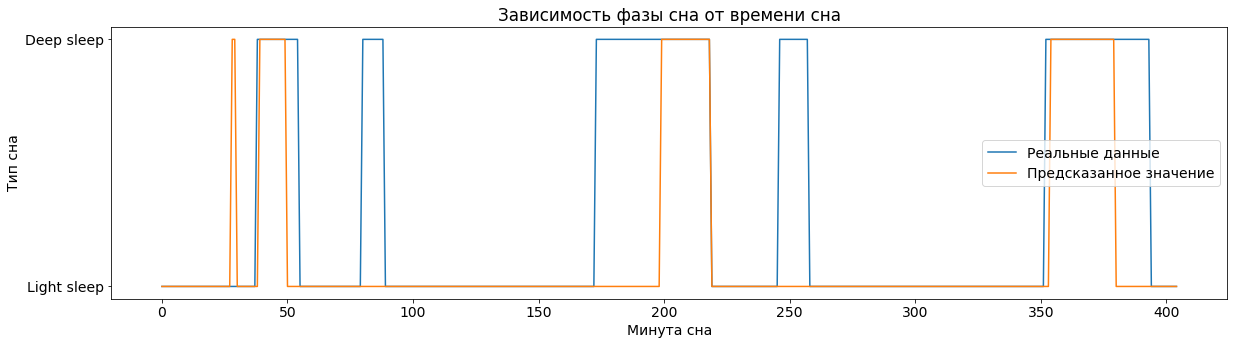

In [ ]:
print(find_time_waking_up(datetime(2023,2,4,23,30), datetime(2023,3,4,8,30), datetime(2023,3,4,8,20),datetime(2023,3,4,8,30)))

Predict time: 8.37 - start light phases


# Вторая ветка снов

In [ ]:
fileDir = r"/content/drive/MyDrive/Sleep_MO/sleep"
fileExt = r".txt"
files = [os.path.join(fileDir, _) for _ in os.listdir(fileDir) if _.endswith(fileExt)]
files

['/content/drive/MyDrive/Sleep_MO/sleep/sleep 2023-02-28 04.25 - 2023-02-28 09.30.txt',
 '/content/drive/MyDrive/Sleep_MO/sleep/sleep 2023-02-10 02.21 - 2023-02-10 02.21.txt',
 '/content/drive/MyDrive/Sleep_MO/sleep/sleep 2023-02-07 10.25 - 2023-02-07 10.25.txt',
 '/content/drive/MyDrive/Sleep_MO/sleep/sleep 2023-02-25 09.22 - 2023-02-25 09.22.txt',
 '/content/drive/MyDrive/Sleep_MO/sleep/sleep 2023-02-09 19.41 - 2023-02-10 02.21.txt',
 '/content/drive/MyDrive/Sleep_MO/sleep/sleep 2023-02-25 03.53 - 2023-02-25 09.22.txt',
 '/content/drive/MyDrive/Sleep_MO/sleep/sleep 2023-03-05 02.56 - 2023-03-05 14.30.txt',
 '/content/drive/MyDrive/Sleep_MO/sleep/sleep 2023-03-10 01.49 - 2023-03-10 10.20.txt',
 '/content/drive/MyDrive/Sleep_MO/sleep/sleep 2023-03-11 02.10 - 2023-03-11 12.21.txt',
 '/content/drive/MyDrive/Sleep_MO/sleep/sleep 2023-03-07 10.12 - 2023-03-07 10.12.txt',
 '/content/drive/MyDrive/Sleep_MO/sleep/sleep 2023-03-01 10.30 - 2023-03-01 10.30.txt',
 '/content/drive/MyDrive/Sleep_M

In [ ]:
sleeps = pd.DataFrame()
for f in files:
  temp = pd.read_json(f)
  sleeps = sleeps.append(temp,ignore_index=True)
sleeps

<ipython-input-78-0d1167c0dab6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sleeps = sleeps.append(temp,ignore_index=True)
<ipython-input-78-0d1167c0dab6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sleeps = sleeps.append(temp,ignore_index=True)
<ipython-input-78-0d1167c0dab6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sleeps = sleeps.append(temp,ignore_index=True)
<ipython-input-78-0d1167c0dab6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sleeps = sleeps.append(temp,ignore_index=True)
<ipython-input-78-0d1167c0dab6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

,time,start_time,end_time,data_start,data_end,phases
0,5.083333,2023-02-28 01:25:00,2023-02-28 06:30:00,2023-02-28T04:25:00,2023-02-28T09:30:00,"[{'value': 'Light sleep', 'start_time': 167754..."
1,6.666667,2023-02-09 16:41:00,2023-02-09 23:21:00,2023-02-09T19:41:00,2023-02-10T02:21:00,"[{'value': 'Light sleep', 'start_time': 167596..."
2,6.883333,2023-02-07 00:32:00,2023-02-07 07:25:00,2023-02-07T03:32:00,2023-02-07T10:25:00,"[{'value': 'Light sleep', 'start_time': 167572..."
3,5.483333,2023-02-25 00:53:00,2023-02-25 06:22:00,2023-02-25T03:53:00,2023-02-25T09:22:00,"[{'value': 'Light sleep', 'start_time': 167728..."
4,6.666667,2023-02-09 16:41:00,2023-02-09 23:21:00,2023-02-09T19:41:00,2023-02-10T02:21:00,"[{'value': 'Light sleep', 'start_time': 167596..."
5,5.483333,2023-02-25 00:53:00,2023-02-25 06:22:00,2023-02-25T03:53:00,2023-02-25T09:22:00,"[{'value': 'Light sleep', 'start_time': 167728..."
6,11.566667,2023-03-04 23:56:00,2023-03-05 11:30:00,2023-03-05T02:56:00,2023-03-05T14:30:00,"[{'value': 'Light sleep', 'start_time': 167797..."
7,8.516667,2023-03-09 22:49:00,2023-03-10 07:20:00,2023-03-10T01:49:00,2023-03-10T10:20:00,"[{'value': 'Light sleep', 'start_time': 167840..."
8,10.183333,2023-03-10 23:10:00,2023-03-11 09:21:00,2023-03-11T02:10:00,2023-03-11T12:21:00,"[{'value': 'Light sleep', 'start_time': 167848..."
9,9.883333,2023-03-06 21:19:00,2023-03-07 07:12:00,2023-03-07T00:19:00,2023-03-07T10:12:00,"[{'value': 'Light sleep', 'start_time': 167813..."


Преобразуем датасет снов в датасет фаз снов

In [ ]:
df_sleeps_phases = make_phases(sleeps.phases,list(sleeps.phases[0][0].keys()))
df_sleeps_phases

<ipython-input-68-f1fd99f90dcf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_phases = data_phases.append(temp,ignore_index=True)
<ipython-input-68-f1fd99f90dcf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_phases = data_phases.append(temp,ignore_index=True)
<ipython-input-68-f1fd99f90dcf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_phases = data_phases.append(temp,ignore_index=True)
<ipython-input-68-f1fd99f90dcf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_phases = data_phases.append(temp,ignore_index=True)
<ipython-input-68-f1fd99f90dcf>:12: FutureWarning: The frame.append method is deprecated

,value,start_time,end_time,time,data_start,data_end,index_dream
0,Light sleep,1677547500,1677548520,17,2023-02-28T04:25:00,2023-02-28T04:42:00,0
1,Deep sleep,1677548520,1677549300,13,2023-02-28T04:42:00,2023-02-28T04:55:00,0
2,Light sleep,1677549300,1677549660,6,2023-02-28T04:55:00,2023-02-28T05:01:00,0
3,Deep sleep,1677549660,1677550500,14,2023-02-28T05:01:00,2023-02-28T05:15:00,0
4,Light sleep,1677550500,1677554760,71,2023-02-28T05:15:00,2023-02-28T06:26:00,0
...,...,...,...,...,...,...,...
421,Light sleep,1678517400,1678518360,16,2023-03-11T09:50:00,2023-03-11T10:06:00,26
422,Awake (during sleep cycle),1678518360,1678518480,2,2023-03-11T10:06:00,2023-03-11T10:08:00,26
423,Light sleep,1678518480,1678524960,108,2023-03-11T10:08:00,2023-03-11T11:56:00,26
424,Deep sleep,1678524960,1678526340,23,2023-03-11T11:56:00,2023-03-11T12:19:00,26


In [ ]:
df_sleeps_phases = date_convert_and_add_features(df_sleeps_phases)
df_sleeps_phases

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day
0,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night
1,Deep sleep,13,2023-02-28 04:42:00,2023-02-28 04:55:00,0,2,4,1,night
2,Light sleep,6,2023-02-28 04:55:00,2023-02-28 05:01:00,0,2,4,1,night
3,Deep sleep,14,2023-02-28 05:01:00,2023-02-28 05:15:00,0,2,5,1,night
4,Light sleep,71,2023-02-28 05:15:00,2023-02-28 06:26:00,0,2,5,1,night
...,...,...,...,...,...,...,...,...,...
421,Light sleep,16,2023-03-11 09:50:00,2023-03-11 10:06:00,26,3,9,5,morning
422,Awake (during sleep cycle),2,2023-03-11 10:06:00,2023-03-11 10:08:00,26,3,10,5,morning
423,Light sleep,108,2023-03-11 10:08:00,2023-03-11 11:56:00,26,3,10,5,morning
424,Deep sleep,23,2023-03-11 11:56:00,2023-03-11 12:19:00,26,3,11,5,morning


In [ ]:
df_sleeps_phases.time.sum()

12751

In [ ]:
df_sleeps_minutes = pd.DataFrame()

for i in range(df_sleeps_phases.shape[0]):
  df_sleeps_minutes = df_sleeps_minutes.append([df_sleeps_phases.iloc[i,:]] * df_sleeps_phases.time[i],ignore_index=True)

df_sleeps_minutes.shape

<ipython-input-14-c0f9964c18f3>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sleeps_minutes = df_sleeps_minutes.append([df_sleeps_phases.iloc[i,:]] * df_sleeps_phases.time[i],ignore_index=True)


(12751, 9)

In [ ]:
df_sleeps_minutes.head()

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day
0,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night
1,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night
2,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night
3,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night
4,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night


In [ ]:
df_sleeps_minutes = create_abs_time(df_sleeps_minutes)
df_sleeps_minutes.head()

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour
0,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,0,0
1,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,1,0
2,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,2,0
3,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,3,0
4,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,4,0


In [ ]:
df_sleeps_minutes = normalize_hour(df_sleeps_minutes)
df_sleeps_minutes

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour,norm_hour
0,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,0,0,4
1,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,1,0,4
2,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,2,0,4
3,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,3,0,4
4,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
12746,Deep sleep,23,2023-03-11 11:56:00,2023-03-11 12:19:00,26,3,11,5,morning,606,10,12
12747,Deep sleep,23,2023-03-11 11:56:00,2023-03-11 12:19:00,26,3,11,5,morning,607,10,12
12748,Deep sleep,23,2023-03-11 11:56:00,2023-03-11 12:19:00,26,3,11,5,morning,608,10,12
12749,Light sleep,2,2023-03-11 12:19:00,2023-03-11 12:21:00,26,3,12,5,morning,609,10,12


In [ ]:
df_sleeps_minutes['hour'] = df_sleeps_minutes['norm_hour']
df_sleeps_minutes.drop('norm_hour',axis =1, inplace=True)
df_sleeps_minutes

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour
0,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,0,0
1,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,1,0
2,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,2,0
3,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,3,0
4,Light sleep,17,2023-02-28 04:25:00,2023-02-28 04:42:00,0,2,4,1,night,4,0
...,...,...,...,...,...,...,...,...,...,...,...
12746,Deep sleep,23,2023-03-11 11:56:00,2023-03-11 12:19:00,26,3,12,5,morning,606,10
12747,Deep sleep,23,2023-03-11 11:56:00,2023-03-11 12:19:00,26,3,12,5,morning,607,10
12748,Deep sleep,23,2023-03-11 11:56:00,2023-03-11 12:19:00,26,3,12,5,morning,608,10
12749,Light sleep,2,2023-03-11 12:19:00,2023-03-11 12:21:00,26,3,12,5,morning,609,10


EDA

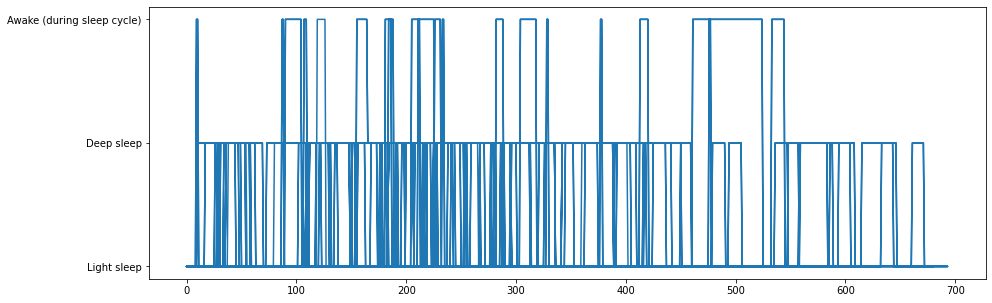

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_sleeps_minutes['abs_min'], df_sleeps_minutes['value'])

In [ ]:
one_dream = df_sleeps_minutes[df_sleeps_minutes.index_dream == 9]
one_dream['time'] = one_dream['time_norm'].dt.strftime('%H:%M:%S')
one_dream

<ipython-input-115-a4dd6b3c0e9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_dream['time'] = one_dream['time_norm'].dt.strftime('%H:%M:%S')


,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour,time_norm
3992,Light sleep,00:19:00,2023-03-07 00:19:00,2023-03-07 02:08:00,9,3,0,1,night,0,0,2023-03-07 00:19:00
3993,Light sleep,00:20:00,2023-03-07 00:19:00,2023-03-07 02:08:00,9,3,0,1,night,1,0,2023-03-07 00:20:00
3994,Light sleep,00:21:00,2023-03-07 00:19:00,2023-03-07 02:08:00,9,3,0,1,night,2,0,2023-03-07 00:21:00
3995,Light sleep,00:22:00,2023-03-07 00:19:00,2023-03-07 02:08:00,9,3,0,1,night,3,0,2023-03-07 00:22:00
3996,Light sleep,00:23:00,2023-03-07 00:19:00,2023-03-07 02:08:00,9,3,0,1,night,4,0,2023-03-07 00:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Light sleep,10:07:00,2023-03-07 09:37:00,2023-03-07 10:12:00,9,3,10,1,morning,588,9,2023-03-07 10:07:00
4581,Light sleep,10:08:00,2023-03-07 09:37:00,2023-03-07 10:12:00,9,3,10,1,morning,589,9,2023-03-07 10:08:00
4582,Light sleep,10:09:00,2023-03-07 09:37:00,2023-03-07 10:12:00,9,3,10,1,morning,590,9,2023-03-07 10:09:00
4583,Light sleep,10:10:00,2023-03-07 09:37:00,2023-03-07 10:12:00,9,3,10,1,morning,591,9,2023-03-07 10:10:00


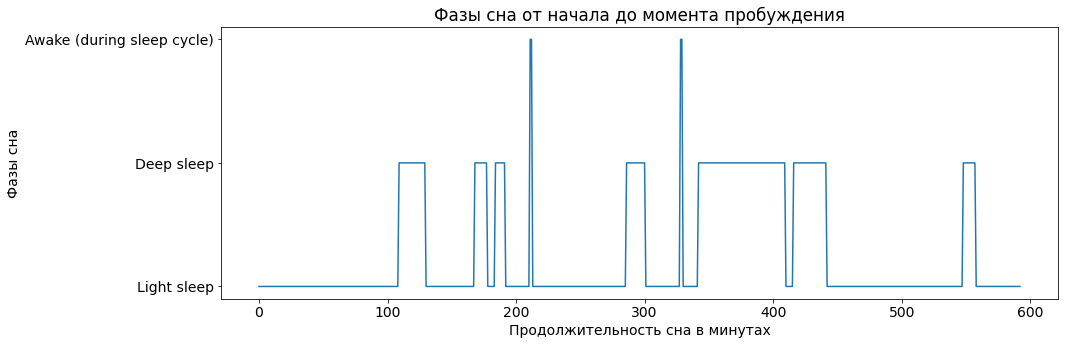

In [ ]:
plt.rcParams['font.size'] = '14'

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

ax.plot(one_dream['abs_min'], one_dream['value'])

plt.title('Фазы сна от начала до момента пробуждения')
plt.ylabel('Фазы сна')
plt.xlabel('Продолжительность сна в минутах')
plt.show()

In [ ]:
df_sleeps_minutes.groupby("value").count().reset_index()

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour,time_norm
0,Awake (during sleep cycle),380,380,380,380,380,380,380,380,380,380,380
1,Deep sleep,3654,3654,3654,3654,3654,3654,3654,3654,3654,3654,3654
2,Light sleep,8717,8717,8717,8717,8717,8717,8717,8717,8717,8717,8717


10

In [ ]:
df_sleeps_minutes[df_sleeps_minutes.index_dream == 10].data_start.min() + timedelta(minutes=int(df_sleeps_minutes[df_sleeps_minutes.index_dream == 10].abs_min.iloc[10]))

Timestamp('2023-03-01 03:13:00')

In [ ]:

for i in range(df_sleeps_minutes.index_dream.max()+1):
  start = df_sleeps_minutes[df_sleeps_minutes.index_dream == i].data_start.min()
  print(start)
  df_sleeps_minutes.loc[(df_sleeps_minutes.index_dream == i),'time_norm'] = df_sleeps_minutes[df_sleeps_minutes.index_dream == i].abs_min.apply(lambda x: start + timedelta(minutes=int(x)))


In [ ]:
df_sleeps_minutes[df_sleeps_minutes.index_dream == 10]

,value,time,data_start,data_end,index_dream,month,hour,dayofweek,time_of_day,abs_min,abs_hour,time_norm
4585,Light sleep,118,2023-03-01 03:03:00,2023-03-01 05:01:00,10,3,3,2,night,0,0,2023-03-01 03:03:00
4586,Light sleep,118,2023-03-01 03:03:00,2023-03-01 05:01:00,10,3,3,2,night,1,0,2023-03-01 03:04:00
4587,Light sleep,118,2023-03-01 03:03:00,2023-03-01 05:01:00,10,3,3,2,night,2,0,2023-03-01 03:05:00
4588,Light sleep,118,2023-03-01 03:03:00,2023-03-01 05:01:00,10,3,3,2,night,3,0,2023-03-01 03:06:00
4589,Light sleep,118,2023-03-01 03:03:00,2023-03-01 05:01:00,10,3,3,2,night,4,0,2023-03-01 03:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Light sleep,58,2023-03-01 09:32:00,2023-03-01 10:30:00,10,3,10,2,morning,442,7,2023-03-01 10:25:00
5028,Light sleep,58,2023-03-01 09:32:00,2023-03-01 10:30:00,10,3,10,2,morning,443,7,2023-03-01 10:26:00
5029,Light sleep,58,2023-03-01 09:32:00,2023-03-01 10:30:00,10,3,10,2,morning,444,7,2023-03-01 10:27:00
5030,Light sleep,58,2023-03-01 09:32:00,2023-03-01 10:30:00,10,3,10,2,morning,445,7,2023-03-01 10:28:00


In [ ]:
df_sleeps_minutes.columns

Index(['value', 'time', 'data_start', 'data_end', 'index_dream', 'month',
       'hour', 'dayofweek', 'time_of_day', 'abs_min', 'abs_hour'],
      dtype='object')

In [ ]:
df_minutes.columns

Index(['value', 'time', 'data_start', 'data_end', 'index_dream', 'month',
       'hour', 'dayofweek', 'time_of_day', 'abs_min', 'abs_hour'],
      dtype='object')

In [ ]:
result_df = pd.concat([df_minutes, df_sleeps_minutes], ignore_index=True, sort=False)
result_df.to_csv('data_dreams_all.csv')